In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from IPython.display import display
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.templates.default = "plotly_white"
import logging
import logzero
logzero.loglevel(logging.INFO)

In [2]:
# Functions frequently used
from BITS.util.scheduler import Scheduler
from BITS.util.io import load_pickle

# Move to the data directory

In [2]:
dir_fname = "result"

In [3]:
import os
os.chdir(dir_fname)

# Input

* DAZZ_DB file of the whole sequenced reads (here `DMEL.db`)

In [8]:
db_prefix = "DMEL"
db_fname = f"{db_prefix}.db"

# Output

* `TAN.DMEL.las`: Output of datander
* `tr_reads.pkl`: Reads with tandem repeat units detected by datruf

# How to run

## Detect TR reads with datander

In [1]:
from vca.datander import DatanderRunner

In [2]:
DatanderRunner?

```
Init signature:
DatanderRunner(
    db_prefix: str,
    n_core: int = 1,
    scheduler: BITS.util.scheduler.Scheduler = None,
) -> None
Docstring:     
Entry point of datander, a commandline tool for detecting tandem repeat regions from (noisy) reads.
In VCA, slightly customized datander is used (alignment will NOT be extended to the ends of a read).

Positional arguments:
  - db_prefix <str> : Prefix of the DB file created with DAZZ_DB. DB file must be in CWD

Optional arguments:
  - n_core       <int>       [1]                 : Number of cores used in datader
  - scheduler    <Scheduler> [None]              : Scheduler object
```

In [10]:
db_prefix = "DMEL"
n_core = 24
scheduler = Scheduler("sge", "qsub", "all.q")

In [12]:
r = DatanderRunner(db_prefix, n_core, scheduler)

In [13]:
r.run()

[I 190808 20:50:48 scheduler:28] Submitting a job: # Datander jobs (16)
    datander -T16 DMEL.1 DMEL.2 DMEL.3 DMEL.4
    datander -T16 DMEL.5 DMEL.6 DMEL.7 DMEL.8
    datander -T16 DMEL.9 DMEL.10 DMEL.11 DMEL.12
    datander -T16 DMEL.13 DMEL.14 DMEL.15 DMEL.16
    datander -T16 DMEL.17 DMEL.18 DMEL.19 DMEL.20
    datander -T16 DMEL.21 DMEL.22 DMEL.23 DMEL.24
    datander -T16 DMEL.25 DMEL.26 DMEL.27 DMEL.28
    datander -T16 DMEL.29 DMEL.30 DMEL.31 DMEL.32
    datander -T16 DMEL.33 DMEL.34 DMEL.35 DMEL.36
    datander -T16 DMEL.37 DMEL.38 DMEL.39 DMEL.40
    datander -T16 DMEL.41 DMEL.42 DMEL.43 DMEL.44
    datander -T16 DMEL.45 DMEL.46 DMEL.47 DMEL.48
    datander -T16 DMEL.49 DMEL.50 DMEL.51 DMEL.52
    datander -T16 DMEL.53 DMEL.54 DMEL.55 DMEL.56
    datander -T16 DMEL.57 DMEL.58 DMEL.59 DMEL.60
    datander -T16 DMEL.61 DMEL.62
    # Check all .las files jobs (13) (optional but recommended)
    LAcheck -vS DMEL TAN.DMEL.1 TAN.DMEL.2 TAN.DMEL.3 TAN.DMEL.4 TAN.DMEL.5
    LAcheck -

Now `TAN.DMEL.las` is generated.

## Detect TR units with datruf

In [3]:
from vca.datruf import DatrufRunner

In [4]:
DatrufRunner?

```
Init signature:
DatrufRunner(
    db_fname: str,
    las_fname: str,
    n_core: int = 1,
    n_distribute: int = 1,
    scheduler: BITS.util.scheduler.Scheduler = None,
) -> None
Docstring:     
Entry point of datruf, which detects units of TRs using the result of datander.

Positional arguments:
  - db_fname  <str> : DAZZ_DB file
  - las_fname <str> : Output of datander. These files must be in CWD

Optional arguments:
  - n_core       <int>       [1]               : Number of cores used in a single job of datrud
  - n_distribute <int>       [1]               : Number of jobs distributed in datruf
  - scheduler    <Scheduler> [None]            : Scheduler object
```

In [7]:
db_fname = "DMEL.db"
las_fname = "TAN.DMEL.las"
n_core = 10
n_distribute = 20
scheduler = Scheduler("sge", "qsub", "all.q")

In [8]:
r = DatrufRunner(db_fname, las_fname, n_core, n_distribute, scheduler)

In [9]:
r.run()

[I 190822 16:13:12 scheduler:28] Submitting a job: python -m vca.datruf.main DMEL.db TAN.DMEL.las datruf/tr_reads.pkl.01 1 71081 10
[I 190822 16:13:12 scheduler:28] Submitting a job: python -m vca.datruf.main DMEL.db TAN.DMEL.las datruf/tr_reads.pkl.02 71082 142162 10
[I 190822 16:13:12 scheduler:28] Submitting a job: python -m vca.datruf.main DMEL.db TAN.DMEL.las datruf/tr_reads.pkl.03 142163 213243 10
[I 190822 16:13:12 scheduler:28] Submitting a job: python -m vca.datruf.main DMEL.db TAN.DMEL.las datruf/tr_reads.pkl.04 213244 284324 10
[I 190822 16:13:12 scheduler:28] Submitting a job: python -m vca.datruf.main DMEL.db TAN.DMEL.las datruf/tr_reads.pkl.05 284325 355405 10
[I 190822 16:13:12 scheduler:28] Submitting a job: python -m vca.datruf.main DMEL.db TAN.DMEL.las datruf/tr_reads.pkl.06 355406 426486 10
[I 190822 16:13:12 scheduler:28] Submitting a job: python -m vca.datruf.main DMEL.db TAN.DMEL.las datruf/tr_reads.pkl.07 426487 497567 10
[I 190822 16:13:12 scheduler:28] Submitti

Now `tr_reads.pkl` is generated.

# Figures

In [ ]:
# TODO: comparison with TRF
# TODO: move datruf Plotter's results here

# datruf plotter

This submodule is used for plotting some figures which require the entire result of datruf and other tandem repeat detection methods if exist. You can compare the results of different methods such as:

* the number of reads detected
* estimated unit length in each tandem repeat
* overall unit length distribution

**[TODO]** Below are under construction. Re-write functions for converting TRF result into the style below and re-generate results.

In [21]:
from datruf import Plotter

In [22]:
Plotter?

```
Init signature: Plotter(start_dbid=1, end_dbid=-1)
Docstring:     
Plot results of tandem repeat analysis. Expected methods are datander, TRF,
and mTR; however, one can specify arbitrary number of input result files
using add_result(). The format of input file must be as follows (separater
is a tab):

    dbid    start   end     unit length     unit sequence
0   20      5       6897    13      AAGAGAGAAAGAG
1   53      1       20823   10      AGAATAACAT

Type:           type
```

In [68]:
# after creating a class instance while specifying the maximum read ID to be used for the plots, you can add formatted results of any methods.
# here we use just a small fraction of the entire results due to file size

p = Plotter(end_dbid=10000)
p.add_result("datruf", datruf_result)
p.add_result("TRF", trf_result)
p.add_result("mTR", mtr_result)

end dbid (datander) = 10000
end dbid (TRF) = 10000
end dbid (mTR) = 10000


In [80]:
results = p.get_results()
results.head()

,dbid,method,start,end,repeat length,unit length,copy number,unit sequence
0,20,datander,5,6887,6882,18,382.333333,NaN
1,20,TRF,5,6897,6892,13,530.153846,AAGAGAGAAAGAG
2,22,datander,899,2419,1520,131,11.603053,NaN
3,24,datander,16,18250,18234,5248,3.474466,NaN
4,39,mTR,2241,2315,74,7,10.571429,AATATAA


Using this table, you can compare the outputs of the three methods with a single read (here we specify the read used in the viewer above).

In [ ]:
display(results[results["dbid"] == 56])

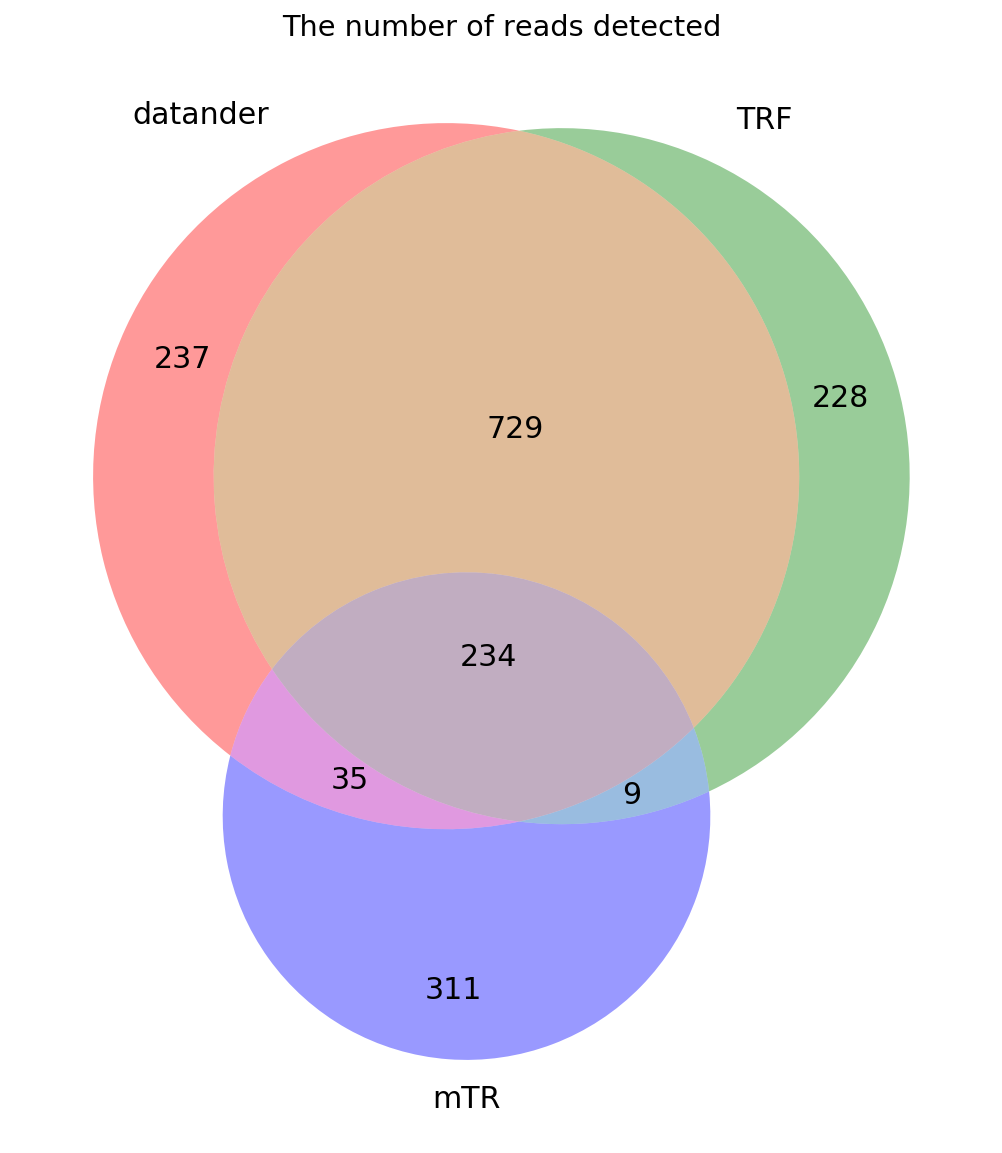

In [55]:
# reads from which at least 1 tandem repeat was detected
# (note that datruf does not report tandem repeats whose unit lengths are short although it can detect borders of tandem repeats themselves)

# TODO: put both results of normal output and only-interval mode?s

p.venn3_detected_read()

In [70]:
p.plot_unit_frequency()

In [69]:
p.plot_unit_length()